In [7]:
# membaca dataset
import pandas as pd
data = pd.read_csv('dataset/Mall_Customers.csv')
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [13]:
# melakukan processing data dengan mengubah nama agar lebih seragam

data = data.rename(columns={'Gender': 'gender', 'Age': 'age', 'Annual Income (k$)' : 'annual_income', 'Spending Score (1-100)' : 'spending_score'})

# mengubah tabel gender menjadi numerik
# data = data['gender'].replace(['Female','Male'], [0,1], inplace = True)
data.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [17]:
# melakukan model clustering
from sklearn.cluster import KMeans

# menghilangkan kolom CustemerId dan gender

x = data.drop(['CustomerID','gender'], axis=1)


In [20]:
# membuat list yang berisi inertia

cluster = []
for i in range(1,11):
    km = KMeans(n_clusters= i).fit(x)
    cluster.append(km.inertia_)

Text(0, 0.5, 'Inertia')

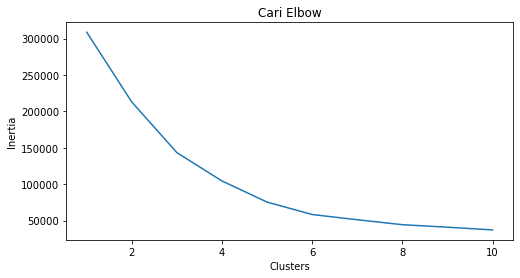

In [30]:
# membuat plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn

# membuat plot inertia 
fig,ax =plt.subplots(figsize=(8,4))
sbn.lineplot(x = list(range(1,11)), y= cluster, ax=ax )
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [35]:
# membuat model KMeans
kms = KMeans(n_clusters=5).fit(x)

# menambahkan kolom label pada dataset
x['Labels'] = kms.labels_

D:\KitPemograman\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

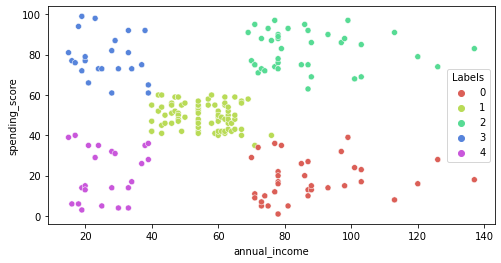

In [41]:
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sbn.scatterplot(x['annual_income'], x['spending_score'], hue=x['Labels'], palette=sbn.color_palette('hls' , 5))